In [181]:
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

In [182]:
df = pd.read_csv('Test3_Full_Original.csv',
            delimiter=',', names=['x', 'y', 'Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 'UVIC_Eduroam1', 'UVIC_Eduroam2', 'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])
df = df.loc[:,['x','y','Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 
       'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'localization2',
       'localization3_5g', 'localization1_5g']]

df['Average'] = (df.Magicv2 + df.localization4 + df.localizationlab + df.Magicv2_5g + df.localization3 + df.localization_lab5g + df.localization1 + df.localization4_5g + df.localization2 + df.localization3_5g + df.localization1_5g)/11

In [183]:
X = df.drop('Average', axis = 1)
y = df['Average']

In [184]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

In [69]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:    3.1s finished


0.4291428249125242
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [186]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = .7, learning_rate = 0.05,
                max_depth = 5, min_child_weight = 4,n_estimators = 500, nthread = 4, silent = 1, subsample = 0.7)

In [187]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)
y_pred

array([-74.38223 , -74.210175, -74.11958 , -74.10719 , -75.66299 ,
       -75.775215, -76.086655, -75.62468 , -75.53502 , -75.31786 ,
       -75.65687 , -75.70713 , -75.64876 , -75.808525, -75.57248 ,
       -75.595894, -75.75914 , -74.592766, -74.26294 , -74.26294 ,
       -73.81234 , -74.35679 , -74.28296 , -73.95313 , -76.02128 ,
       -73.819954, -73.45919 , -73.43712 , -73.138985, -73.138985,
       -73.730064, -73.730064, -73.730064, -73.3111  , -73.46525 ,
       -73.47208 , -74.25269 , -74.07429 , -74.005   , -73.77575 ,
       -73.77575 , -73.564674, -73.564674, -73.43912 , -72.99454 ,
       -73.112854, -72.70923 , -72.735016, -72.49673 , -72.2353  ,
       -72.44118 , -72.53551 , -72.312805, -74.83854 , -72.32151 ,
       -72.039345, -72.43331 , -72.208954, -72.53276 , -72.208954,
       -72.208954, -72.20769 , -72.888756, -72.61663 , -74.6499  ,
       -74.521454, -74.440475, -72.533844, -72.41657 , -72.0332  ,
       -72.20908 , -73.27086 , -72.3669  , -72.456436, -72.416

In [188]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.9187069432830176

In [189]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
496,-74.090909,-74.382233
497,-74.181818,-74.210175
498,-74.090909,-74.119583
499,-74.181818,-74.107193
500,-75.000000,-75.662987
...,...,...
615,-70.363636,-72.308067
616,-70.181818,-72.292862
617,-70.454545,-72.292862
618,-70.363636,-72.292862


In [190]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.6407267550918714
Mean Squared Error: 0.8440224476364258
Root Mean Squared Error: 0.9187069432830176


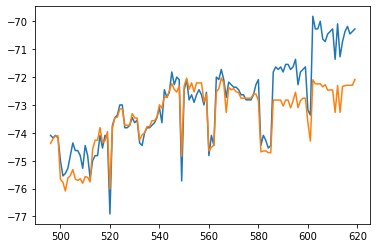

In [191]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)
plt.show()

In [192]:
y_pred = xg_reg.predict(X)

In [193]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
rmse

0.4138431283055366

In [194]:
df=pd.DataFrame({'Actual':y, 'Predicted':y_pred})
df

,Actual,Predicted
0,-66.181818,-66.212357
1,-65.636364,-65.538872
2,-64.909091,-64.907867
3,-65.272727,-65.319298
4,-65.545455,-65.514679
...,...,...
615,-70.363636,-72.308067
616,-70.181818,-72.292862
617,-70.454545,-72.292862
618,-70.363636,-72.292862


In [195]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))


Mean Absolute Error: 0.16303358553441757
Mean Squared Error: 0.17126613484571285
Root Mean Squared Error: 0.4138431283055366


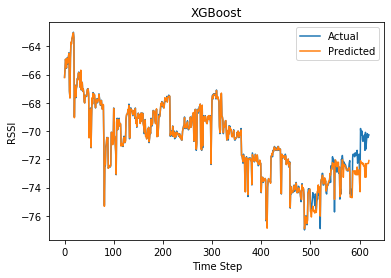

In [196]:
df.Actual.plot( legend = True)
df.Predicted.plot( legend = True)
plt.title('XGBoost')
plt.xlabel('Time Step')
plt.ylabel('RSSI')
plt.show()